In [1]:
import requests
import matplotlib.pyplot as plt

In [ ]:
#Alpha Vantage API: https://www.alphavantage.co/documentation/ 
#IBM

In [28]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=GX7VY5CL1SMMU0M2'
r = requests.get(url)
data = r.json()

meta_data = data['Meta Data']
print("Meta Data:")
for key, value in meta_data.items():
    print(f"{key}: {value}")

time_series = data['Time Series (5min)']
print("\nTime Series (5min):")
for timestamp, values in time_series.items():
    print(f"Timestamp: {timestamp}")
    print("Values:")
    for key, value in values.items():
        print(f"{key}: {value}")
    print()


Meta Data:
1. Information: Intraday (5min) open, high, low, close prices and volume
2. Symbol: IBM
3. Last Refreshed: 2023-05-12 20:00:00
4. Interval: 5min
5. Output Size: Compact
6. Time Zone: US/Eastern

Time Series (5min):
Timestamp: 2023-05-12 20:00:00
Values:
1. open: 122.7500
2. high: 122.7500
3. low: 122.7500
4. close: 122.7500
5. volume: 363

Timestamp: 2023-05-12 19:55:00
Values:
1. open: 122.7600
2. high: 122.7600
3. low: 122.7600
4. close: 122.7600
5. volume: 490

Timestamp: 2023-05-12 19:50:00
Values:
1. open: 122.6500
2. high: 122.6500
3. low: 122.6500
4. close: 122.6500
5. volume: 263

Timestamp: 2023-05-12 19:35:00
Values:
1. open: 122.6500
2. high: 122.6500
3. low: 122.6500
4. close: 122.6500
5. volume: 1000

Timestamp: 2023-05-12 18:15:00
Values:
1. open: 122.6500
2. high: 122.8300
3. low: 122.6000
4. close: 122.8300
5. volume: 1487

Timestamp: 2023-05-12 18:05:00
Values:
1. open: 122.6300
2. high: 122.6300
3. low: 122.6300
4. close: 122.6300
5. volume: 2000

Timestamp

In [25]:
def get_stock_data():
    url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=GX7VY5CL1SMMU0M2'
    r = requests.get(url)
    data = r.json()
    return data['Time Series (5min)']

In [26]:
def visualize_stock_data(data):
    dates = list(data.keys())[::-1]
    prices = []
    for date in dates:
        if '4. close' in data[date]:
            try:
                price = float(data[date]['4. close'])
                prices.append(price)
            except ValueError:
                print(f"Invalid price data for date {date}. Skipping.")
        else:
            print(f"Closing price data for date {date} is not available. Skipping.")

    if not prices:
        print("No valid closing prices found. Unable to visualize data.")
        return

    plt.plot(dates, prices)
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title('Stock Price')

    num_dates = len(dates)
    if num_dates > 10:
        step = num_dates // 10 
        plt.xticks(range(0, num_dates, step), [date for i, date in enumerate(dates) if i % step == 0], rotation=45)

    plt.show()

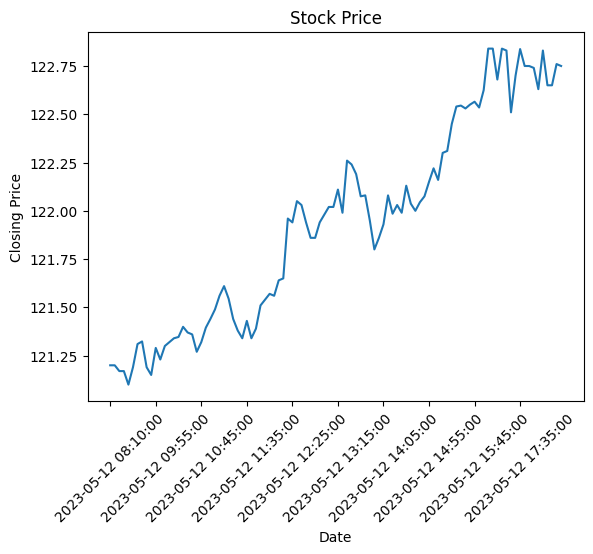

In [27]:
stock_data = get_stock_data()
visualize_stock_data(stock_data)